In [17]:
from scipy.stats import weibull_min

# Define the shape and scale parameters for the Fréchet distribution
shape = 2.0
scale = 2.0  # Change this value to alter the scale parameter

# Draw 10 samples from the Fréchet distribution
samples = weibull_min.rvs(shape, scale=scale, size=10)

print(samples)

[1.80744313 2.26635655 2.16060597 2.07512434 0.90747761 3.16538539
 1.79129208 1.64576075 2.01475609 0.77351017]


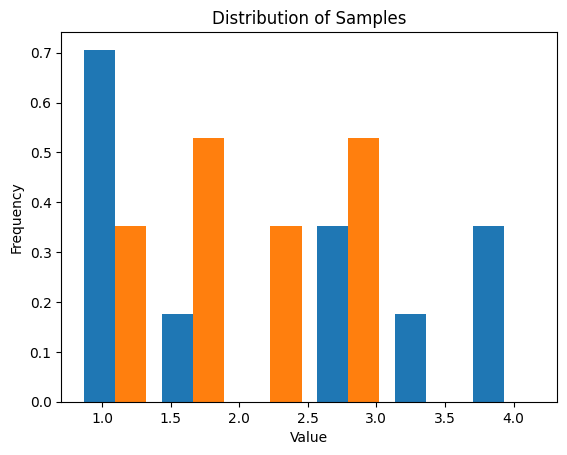

[[1.3050389  1.29713739]
 [1.68410911 1.59980717]
 [0.81109501 0.94904348]
 [1.36012215 1.93413723]
 [1.3761657  2.61804013]
 [2.51737774 2.08444206]
 [2.57161178 1.40820757]
 [3.74325928 2.54398748]
 [3.50941646 2.27502128]
 [4.21090079 2.83224219]]


In [18]:
import numpy as np
from scipy.stats import norm, weibull_min
from sklearn.datasets import make_spd_matrix
import matplotlib.pyplot as plt

# Define the shape and scale parameters for the Weibull distribution
shape = 2.0
scale = 2.0

# Define the correlation matrix (must be positive semi-definite)
corr_matrix = np.array([[1, 0.5], 
                        [0.5, 1]])

# Generate samples from a multivariate normal distribution
mvnorm_samples = np.random.multivariate_normal(mean=[0, 0], cov=corr_matrix, size=10)

# Apply the cumulative distribution function of the normal distribution
u = norm.cdf(mvnorm_samples)

# Apply the inverse of the Weibull cumulative distribution function
samples = weibull_min.ppf(u, shape, scale=scale)

# Plot the distribution of the samples
plt.hist(samples, bins='auto', density=True)
plt.title('Distribution of Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

print(samples)

In [19]:
# Generate a matrix of random weights that sum to 1 for each row
weights = np.random.dirichlet(np.ones(samples.shape[1]), size=samples.shape[0])

# Apply the weights to the sample matrix
weighted_samples = samples * weights

print(weighted_samples)

[[1.48603861e-02 1.28236698e+00]
 [1.32409875e+00 3.41989214e-01]
 [3.29952853e-01 5.62973292e-01]
 [1.69249160e-01 1.69345951e+00]
 [6.65736187e-01 1.35153272e+00]
 [1.19297810e+00 1.09663094e+00]
 [9.94271433e-03 1.40276296e+00]
 [1.29170710e+00 1.66611971e+00]
 [1.97620277e-01 2.14691157e+00]
 [4.20725334e+00 2.45326260e-03]]


In [20]:
def prod_draws(n_draws, n_samples, shape, scale, corr_matrix):
    import numpy as np
    from scipy.stats import norm, weibull_min

    # Get the number of factors from the correlation matrix
    n_factors = corr_matrix.shape[0]

    # Generate samples from a multivariate normal distribution
    mvnorm_samples = np.random.multivariate_normal(mean=np.zeros(n_factors), cov=corr_matrix, size=n_draws * n_samples)

    # Apply the cumulative distribution function of the normal distribution
    u = norm.cdf(mvnorm_samples)

    # Apply the inverse of the Weibull cumulative distribution function
    samples = weibull_min.ppf(u, shape, scale=scale)

    # Reshape the samples to have the same shape as the multivariate normal samples
    samples = samples.reshape(n_draws, n_samples, n_factors)

    return samples

# Define the parameters for the Fréchet distribution
shape = 2.0
scale = 2.0

# Define the correlation matrix
corr_matrix = np.array([[1, 0.5], 
                        [0.5, 1]])

# Generate 10 draws of 5 samples each
samples = prod_draws(10, 5, shape, scale, corr_matrix)

print(samples)

[[[3.28182735 3.17195108]
  [2.19992178 1.92871404]
  [2.27953025 1.10584598]
  [1.1120698  0.84987802]
  [2.94437358 2.92998609]]

 [[1.51245858 1.39487703]
  [1.13659661 0.40445493]
  [1.06459454 1.27834984]
  [1.88187847 0.99001788]
  [0.41179908 0.37935286]]

 [[3.80928139 2.90959171]
  [3.37178362 4.87701303]
  [2.41439544 1.75788459]
  [1.26820198 0.37370638]
  [2.58666286 2.51828506]]

 [[3.66545846 3.29543546]
  [3.21440043 1.96905353]
  [3.35940696 3.05062544]
  [2.15544666 2.65526043]
  [2.66095426 1.92356413]]

 [[0.36191117 0.85358655]
  [1.41116433 0.22663291]
  [1.24707087 0.65388697]
  [0.35999797 1.95401446]
  [3.49788093 2.9028762 ]]

 [[0.59848375 1.05108153]
  [3.15139755 2.55503001]
  [2.80185246 1.40774128]
  [2.26178182 1.22541392]
  [2.29795683 2.00052603]]

 [[1.21647755 1.32164104]
  [0.68112384 0.68476483]
  [1.28448332 1.29601141]
  [2.31956365 3.66677097]
  [1.49993604 2.71117239]]

 [[1.47576265 2.50061159]
  [1.74976936 1.2928103 ]
  [1.01025021 0.99848218

In [21]:
# Generate a matrix of random weights that sum to 1 for each row
weights = np.random.dirichlet(np.ones(samples.shape[1]), size=samples.shape[0])

# Apply the weights to the sample matrix
weighted_samples = samples * weights[:, :, np.newaxis]

print(weighted_samples)

[[[1.21449857 1.1738369 ]
  [0.05658574 0.04960982]
  [0.14739321 0.07150341]
  [0.44363323 0.33903819]
  [0.41405352 0.41203028]]

 [[0.04406775 0.04064183]
  [0.63348468 0.22542386]
  [0.21465873 0.25775912]
  [0.22614441 0.11896996]
  [0.03776506 0.0347895 ]]

 [[0.6577665  0.50241286]
  [1.05624222 1.52776918]
  [0.0473783  0.03449542]
  [0.57592823 0.16971118]
  [0.10427645 0.10151993]]

 [[1.25319924 1.12669049]
  [0.05143655 0.03150862]
  [0.98701171 0.89629005]
  [0.52499035 0.64672725]
  [0.27869226 0.20146248]]

 [[0.05325802 0.12561184]
  [0.20405661 0.03277148]
  [0.16285596 0.08539161]
  [0.01147591 0.06228952]
  [1.90904617 1.58430913]]

 [[0.02971498 0.05218666]
  [0.42175853 0.34194534]
  [0.20721975 0.1041139 ]
  [0.41789429 0.22641153]
  [1.28179091 1.11588523]]

 [[0.04894357 0.0531747 ]
  [0.35601214 0.35791523]
  [0.11375705 0.11477801]
  [0.33587916 0.53095847]
  [0.30556321 0.55231324]]

 [[0.26303493 0.44570054]
  [0.16964036 0.12533812]
  [0.18784484 0.1856567 

In [30]:
person = prod_draws(1, 1, shape, scale, corr_matrix)

print(person)

result = weighted_samples * person

print(result)


[[[1.28582964 0.60715999]]]
[[[1.56163826 0.71270681]
  [0.07275962 0.0301211 ]
  [0.18952255 0.04341401]
  [0.57043676 0.20585043]
  [0.53240229 0.2501683 ]]

 [[0.05666361 0.02467609]
  [0.81455337 0.13686835]
  [0.27601455 0.15650102]
  [0.29078318 0.0722338 ]
  [0.04855943 0.02112279]]

 [[0.84577566 0.30504499]
  [1.35814755 0.92760032]
  [0.06092042 0.02094424]
  [0.74054559 0.10304184]
  [0.13408175 0.06163884]]

 [[1.61140072 0.68408139]
  [0.06613863 0.01913077]
  [1.2691289  0.54419146]
  [0.67504815 0.39266691]
  [0.35835077 0.12231996]]

 [[0.06848074 0.07626648]
  [0.26238204 0.01989753]
  [0.20940502 0.05184637]
  [0.01475607 0.03781971]
  [2.45470815 0.96192912]]

 [[0.03820841 0.03168565]
  [0.54230962 0.20761553]
  [0.2664493  0.0632138 ]
  [0.53734086 0.13746802]
  [1.64816474 0.67752087]]

 [[0.06293309 0.03228555]
  [0.45777096 0.21731181]
  [0.14627219 0.06968861]
  [0.43188338 0.32237674]
  [0.39290223 0.3353425 ]]

 [[0.33821811 0.27061154]
  [0.2181286  0.076100

In [34]:
# Sum the rows of each individual draw matrix
row_sums = np.sum(result, axis=2)

print(row_sums)

# Pick the maximum value of each row
max_values = np.amax(row_sums, axis=1)

print(max_values)

print(np.amax(max_values))

[[2.27434506 0.10288072 0.23293656 0.77628719 0.78257059]
 [0.08133971 0.95142173 0.43251558 0.36301698 0.06968223]
 [1.15082065 2.28574788 0.08186466 0.84358743 0.19572058]
 [2.29548211 0.08526941 1.81332036 1.06771506 0.48067073]
 [0.14474722 0.28227957 0.26125139 0.05257578 3.41663727]
 [0.06989406 0.74992515 0.3296631  0.67480889 2.32568561]
 [0.09521864 0.67508277 0.2159608  0.75426012 0.72824473]
 [0.60882965 0.29422889 0.35425978 0.61618152 0.75223173]
 [0.67076159 1.05165119 0.34483085 0.77721366 0.1466643 ]
 [0.15904914 0.20950994 0.52924309 1.28951559 0.80017028]]
[2.27434506 0.95142173 2.28574788 2.29548211 3.41663727 2.32568561
 0.75426012 0.75223173 1.05165119 1.28951559]
3.4166372665395537


In [5]:
import numpy as np

def prod_draws(n_sectors, n_cities, shape, scale, corr_matrix):
    import numpy as np
    from scipy.stats import norm, weibull_min

    # Check if the shape parameter matches the number of cities and factors
    # if shape.shape != (n_cities, corr_matrix.shape[0]):
    #     raise ValueError("The shape of the shape parameter must match the number of cities and factors")

    # Get the number of factors from the correlation matrix
    n_factors = corr_matrix.shape[0]

    # Generate samples from a multivariate normal distribution
    mvnorm_samples = np.random.multivariate_normal(mean=np.zeros(n_factors), cov=corr_matrix, size=n_sectors * n_cities)

    # Apply the cumulative distribution function of the normal distribution
    u = norm.cdf(mvnorm_samples)

    # Apply the inverse of the Weibull cumulative distribution function with a unique shape parameter for each factor for each city
    samples = np.empty_like(u)
    for i in range(n_cities):
        for j in range(n_factors):
            samples[:, i * n_factors + j] = weibull_min.ppf(u[:, i * n_factors + j], shape[i, j], scale=scale[i, j])

    # Reshape the samples to have the same shape as the multivariate normal samples
    samples = samples.reshape(n_sectors, n_cities, n_factors)

    return samples

#Define the correlation matrix
corr_matrix = np.array([[1, 0.5], 
                        [0.5, 1]])

# Define the shape parameter
shape = 2.0

#Define the scale parameter
scale = np.array([[2.0, 2.0], 
                  [3.0, 3.0],
                  [2.5, 2.5],
                  [3.5, 3.5],
                  [2.2, 2.2]])

# Generate 10 draws of 5 samples each
samples = prod_draws(10, 5, shape, scale, corr_matrix)

print(samples)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [5]:
import numpy as np

# Generate two draws from a normal distribution with mean 0 and standard deviation 1
draws = np.random.normal(loc=0, scale=1, size=2) 

# Put the draws in a matrix
matrix = np.array([np.absolute(draws)])

print(matrix)

# Generate a weight matrix for 5 sectors and 2 technologies
weights = np.random.dirichlet(np.ones(2), size=5)

print(weights)

weighted_samples = matrix * weights

print(weighted_samples)



[[0.79604644 1.24554448]]
[[0.45562546 0.54437454]
 [0.38892126 0.61107874]
 [0.41916667 0.58083333]
 [0.17324253 0.82675747]
 [0.07804838 0.92195162]]
[[0.36269902 0.6780427 ]
 [0.30959938 0.76112575]
 [0.33367614 0.72345374]
 [0.1379091  1.0297632 ]
 [0.06213014 1.14833175]]


In [6]:
tech_correlation = np.array([0.7, 0.5])

powered_samples = np.power(weighted_samples, tech_correlation)

print(powered_samples)

NameError: name 'tech_correration' is not defined